In [ ]:
!pip install git+https://github.com/reutd/ABC.git
!pip install matplotlib==3.6


<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

RuntimeError: ignored

Dataset before integration:


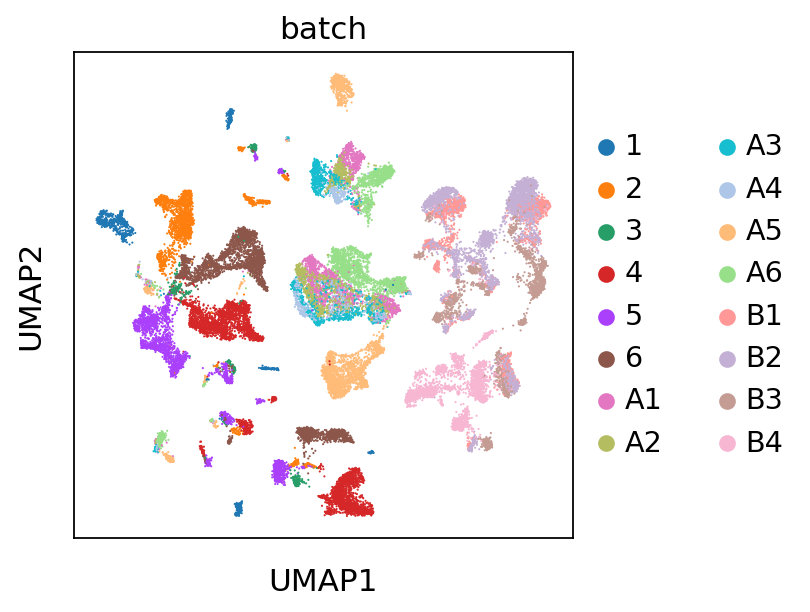

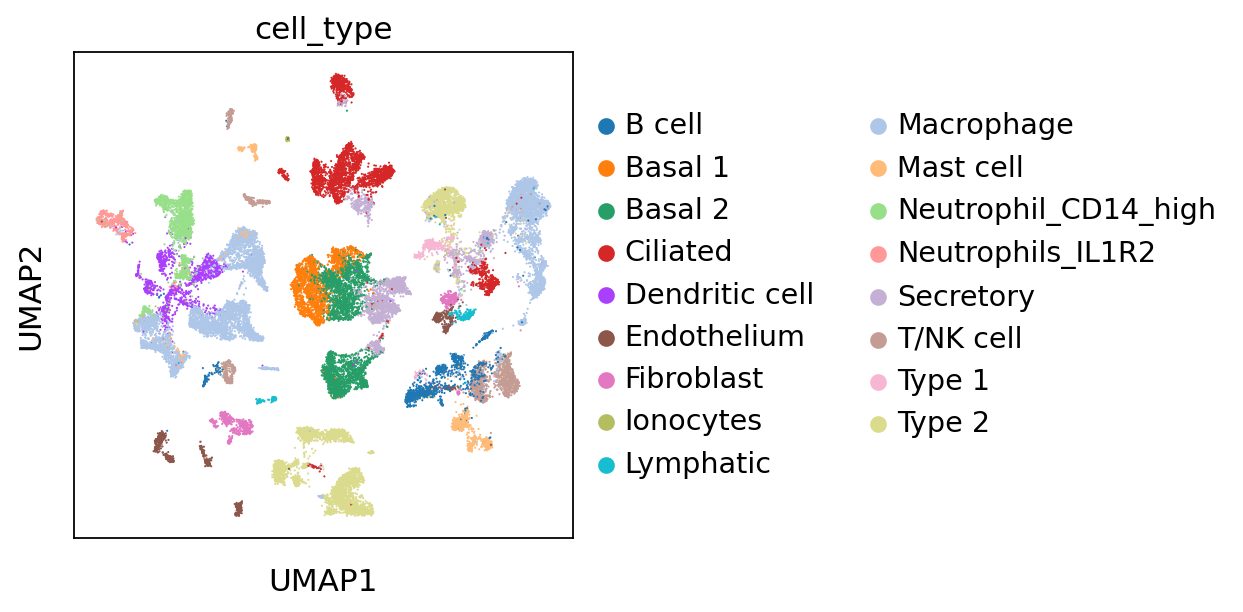

Using 41 HVGs from full intersect set
Using 80 HVGs from n_batch-1 set
Using 109 HVGs from n_batch-2 set
Using 153 HVGs from n_batch-3 set
Using 199 HVGs from n_batch-4 set
Using 249 HVGs from n_batch-5 set
Using 299 HVGs from n_batch-6 set
Using 374 HVGs from n_batch-7 set
Using 418 HVGs from n_batch-8 set
Using 461 HVGs from n_batch-9 set
Using 577 HVGs from n_batch-10 set
Using 40 HVGs from n_batch-11 set
Using 3000 HVGs
The given adata.X matrix is sparse. Converting to dense.
Epoch 1/50
508/508 [==============================] - 10s 7ms/step - loss: 0.3966 - classifier_loss: 0.7459 - decoderOut_loss: 0.0847 - latent_classifier_loss: 2.0377 - model_loss: 0.3069 - disc_loss: 1.8474 - advs_loss: 0.4011
Epoch 2/50
508/508 [==============================] - 4s 7ms/step - loss: 0.2607 - classifier_loss: 0.5318 - decoderOut_loss: 0.0886 - latent_classifier_loss: 1.2828 - model_loss: 0.1460 - disc_loss: 1.7100 - advs_loss: 0.4756
Epoch 3/50
508/508 [==============================] - 4s 7ms

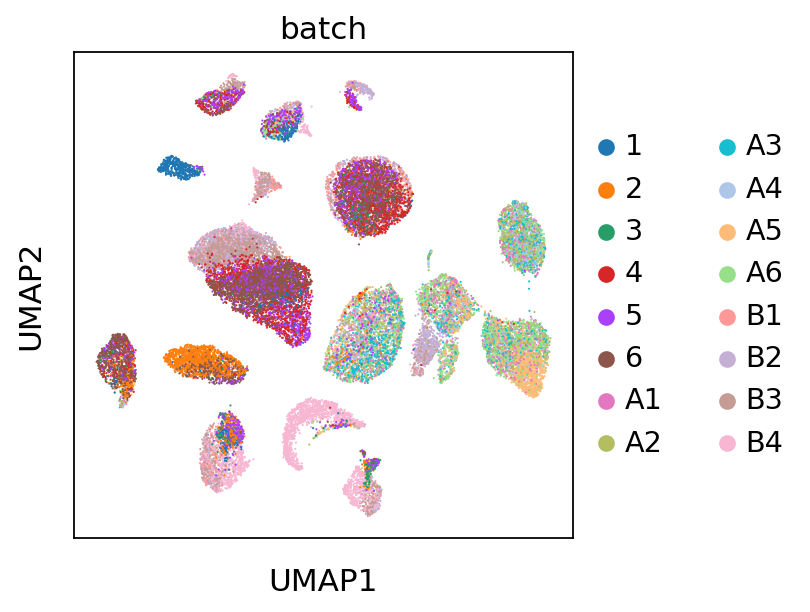

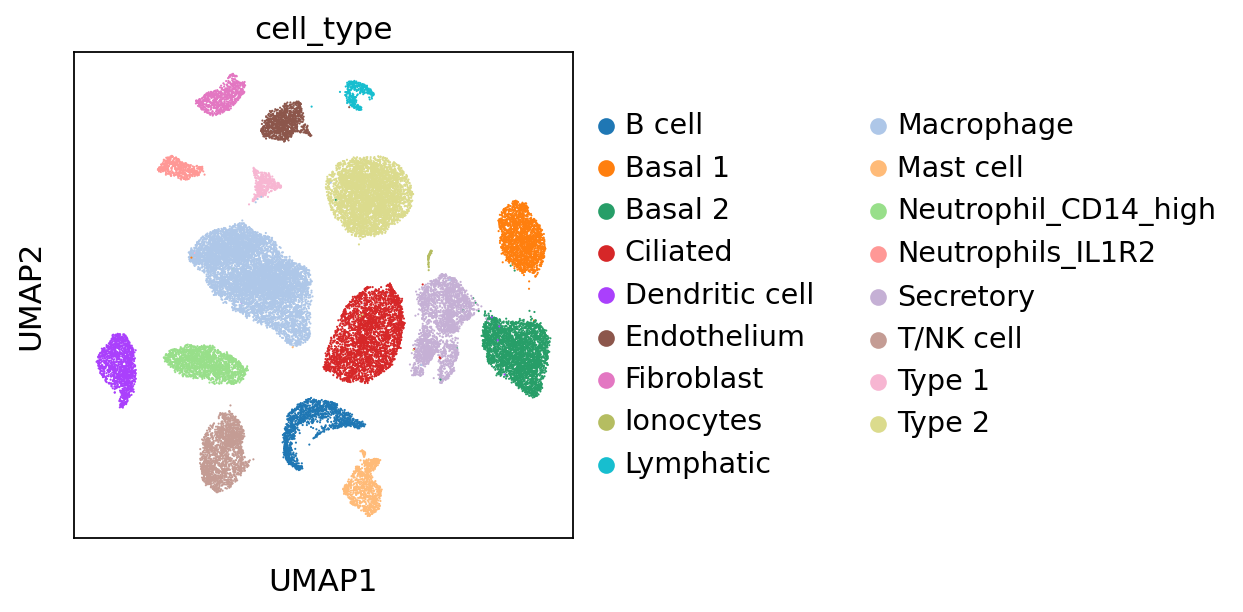

In [1]:
from ABC import ABC
import os
import scanpy as sc
import matplotlib
import warnings
warnings.filterwarnings('ignore')

base_path = '/content/drive/MyDrive/Colab Notebooks/integrationDatasets/'

dataset_name = 'Lung_atlas_public'
label_key = 'cell_type'
batch_key = 'batch'

# read dataset into an anndata object
inPath = os.path.join(base_path, f"{dataset_name}.h5ad")
adata = sc.read(inPath)

# --- Plot original data ---

matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.set_figure_params(dpi_save=300)
print("Dataset before integration:")
sc.pp.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata, n_neighbors=25)
sc.tl.umap(adata, random_state=42)
sc.pl.umap(adata, palette=matplotlib.rcParams["axes.prop_cycle"],
           color=[batch_key], show=True, use_raw=False)
sc.pl.umap(adata, palette=matplotlib.rcParams["axes.prop_cycle"],
           color=[label_key], show=True, use_raw=False)

# --- Integrate data ---

# create the ABC model
model = ABC(adata, batch_key, label_key)

# train the model and integrate the dataset
integrated = model.batch_correction()

# --- Plot integrated data ---

print("Dataset after integration using ABC:")
sc.pp.pca(integrated, svd_solver="arpack")
sc.pp.neighbors(integrated, n_neighbors=25)
sc.tl.umap(integrated, random_state=42)
sc.pl.umap(integrated, palette=matplotlib.rcParams["axes.prop_cycle"],
           color=[batch_key], show=True, use_raw=False)
sc.pl.umap(integrated, palette=matplotlib.rcParams["axes.prop_cycle"],
           color=[label_key], show=True, use_raw=False)

